In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp
import plotly.subplots
#import Pipeline for sequence of data preprocessing and modeling steps
from sklearn.pipeline import Pipeline
#Applies different preprocessing to numerical and catagorical feature
from sklearn.compose import ColumnTransformer
#Handles the missing values and by replacing them with mean,median, or most frequent values
from sklearn.impute import SimpleImputer


In [2]:
#store data in data varaible
data=pd.read_csv('house_prices_third.csv')
#show head columns of data
data.head()

,ID,Bedrooms,SqFt,Location,YearBuilt,Price
0,1,2,5036,2,1987,720537
1,2,4,4855,2,2011,934614
2,3,2,2093,0,1996,444449
3,4,1,4892,4,1985,641913
4,5,2,4881,4,2020,769609


In [3]:
#Read info of data
data.info

<bound method DataFrame.info of       ID  Bedrooms  SqFt  Location  YearBuilt   Price
0      1         2  5036         2       1987  720537
1      2         4  4855         2       2011  934614
2      3         2  2093         0       1996  444449
3      4         1  4892         4       1985  641913
4      5         2  4881         4       2020  769609
..   ...       ...   ...       ...        ...     ...
295  296         4  1226         3       1998  546617
296  297         1  3374         4       1969  485587
297  298         3  3998         3       1953  696099
298  299         4  3908         1       1990  801201
299  300         5  2985         3       1954  780752

[300 rows x 6 columns]>

In [4]:
#also show information of data
data.describe()

,ID,Bedrooms,SqFt,Location,YearBuilt,Price
count,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,150.500000,3.010000,3519.033333,2.086667,1985.360000,6.721938e+05
std,86.746758,1.412995,1446.051815,1.425692,21.148078,2.059710e+05
min,1.000000,1.000000,1035.000000,0.000000,1950.000000,2.095510e+05
25%,75.750000,2.000000,2226.750000,1.000000,1969.000000,5.134628e+05
50%,150.500000,3.000000,3599.000000,2.000000,1986.000000,6.771340e+05
75%,225.250000,4.000000,4843.750000,3.000000,2002.000000,8.349348e+05
max,300.000000,5.000000,5980.000000,4.000000,2022.000000,1.115559e+06


In [5]:
#see Nan columns
data.isnull()

,ID,Bedrooms,SqFt,Location,YearBuilt,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
295,False,False,False,False,False,False
296,False,False,False,False,False,False
297,False,False,False,False,False,False
298,False,False,False,False,False,False


In [6]:
#show the null columns innd data
data.isna().sum().sum()

0

Exploratory Data Analysis Report: House Prices Dataset

## 1. Introduction
This report presents a comprehensive Exploratory Data Analysis (EDA) performed on the House Prices dataset. The goal of this EDA is to understand the underlying patterns, relationships, and characteristics of the data, which can inform subsequent modeling efforts.

## 2. Data Loading and Initial Exploration

The dataset `house_prices_third.csv` was loaded and its initial characteristics were examined. The dataset contains 300 entries and 6 columns. Below is a summary of the initial data inspection:

- **First 5 Rows:**
```
   ID  Bedrooms  SqFt  Location  YearBuilt   Price
0   1         2  5036         2       1987  720537
1   2         4  4855         2       2011  934614
2   3         2  2093         0       1996  444449
3   4         1  4892         4       1985  641913
4   5         2  4881         4       2020  769609
```

- **Dataset Info:**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         300 non-null    int64
 1   Bedrooms   300 non-null    int64
 2   SqFt       300 non-null    int64
 3   Location   300 non-null    int64
 4   YearBuilt  300 non-null    int64
 5   Price      300 non-null    int64
dtypes: int64(6)
memory usage: 14.2 KB
```

- **Dataset Shape:** (300, 6)

## 3. Data Quality Assessment

### Missing Values
No missing values were found in any of the columns, indicating a clean dataset in terms of completeness.

```
ID           0
Bedrooms     0
SqFt         0
Location     0
YearBuilt    0
Price        0
dtype: int64
```

### Data Types
All columns are of integer type (`int64`), which is appropriate for the given features.

```
ID           int64
Bedrooms     int64
SqFt         int64
Location     int64
YearBuilt    int64
Price        int64
dtype: object
```

## 4. Descriptive Statistics and Distribution Analysis

Descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset's distribution. Below are the descriptive statistics for all numerical columns:

```
               ID    Bedrooms  ...    YearBuilt         Price
count  300.000000  300.000000  ...   300.000000  3.000000e+02
mean   150.500000    3.010000  ...  1985.360000  6.721938e+05
std     86.746758    1.412995  ...    21.148078  2.059710e+05
min      1.000000    1.000000  ...  1950.000000  2.095510e+05
25%     75.750000    2.000000  ...  1969.000000  5.134628e+05
50%    150.500000    3.000000  ...  1986.000000  6.771340e+05
75%    225.250000    4.000000  ...  2002.000000  8.349348e+05
max    300.000000    5.000000  ...  2022.000000  1.115559e+06
[8 rows x 6 columns]
```

Key observations from descriptive statistics:
- **ID:** A unique identifier, not relevant for analysis.
- **Bedrooms:** The number of bedrooms ranges from 1 to 5, with an average of approximately 3 bedrooms.
- **SqFt:** Square footage varies widely, from 1000 to 6000, with a mean of around 3500 sqft.
- **Location:** This appears to be a categorical variable encoded as integers (0-4).
- **YearBuilt:** Houses were built between 1950 and 2022, with an average build year around 1985.
- **Price:** House prices range from approximately $209,551 to $1,115,559, with an average price of around $672,193.8.

## 5. Univariate Analysis with Visualizations

Univariate analysis focuses on individual variables to understand their distribution and identify potential outliers. Histograms and box plots were generated for `Bedrooms`, `SqFt`, `YearBuilt`, and `Price`.

### Bedrooms
![Distribution of Bedrooms](/home/ubuntu/Bedrooms_univariate_analysis.png)
- The distribution of bedrooms shows a relatively even spread across 1 to 5 bedrooms, with 4 bedrooms being slightly more frequent.

### SqFt
![Distribution of SqFt](/home/ubuntu/SqFt_univariate_analysis.png)
- The square footage distribution appears somewhat uniform, with slight peaks around 1500-2000 sqft and 4500-5000 sqft. The box plot shows a wide range, but no significant outliers.

### YearBuilt
![Distribution of YearBuilt](/home/ubuntu/YearBuilt_univariate_analysis.png)
- The distribution of `YearBuilt` indicates a mix of older and newer properties, with some concentration around the 1980s and early 2000s.

### Price
![Distribution of Price](/home/ubuntu/Price_univariate_analysis.png)
- The price distribution appears to be somewhat normally distributed, with a slight skew towards higher prices. The box plot shows the majority of prices fall within a certain range, with some potential outliers at the lower and higher ends.

## 6. Bivariate and Correlation Analysis

Bivariate analysis explores the relationship between pairs of variables. Scatter plots were used for numerical features against `Price`, and a box plot for `Location` against `Price`. A correlation matrix heatmap was also generated.

### Price vs. Bedrooms
![Price vs. Bedrooms Scatter Plot](/home/ubuntu/Price_vs_Bedrooms_scatterplot.png)
- There appears to be a positive relationship between the number of bedrooms and price, though with considerable spread. Houses with more bedrooms generally tend to have higher prices.

### Price vs. SqFt
![Price vs. SqFt Scatter Plot](/home/ubuntu/Price_vs_SqFt_scatterplot.png)
- A strong positive linear relationship is observed between `SqFt` and `Price`. As square footage increases, the price of the house generally increases.

### Price vs. YearBuilt
![Price vs. YearBuilt Scatter Plot](/home/ubuntu/Price_vs_YearBuilt_scatterplot.png)
- The relationship between `YearBuilt` and `Price` is less clear. While newer houses might command higher prices, there's a wide range of prices across all build years, suggesting other factors are at play.

### Price vs. Location
![Price vs. Location Box Plot](/home/ubuntu/Price_vs_Location_boxplot.png)
- The box plot for `Price` vs. `Location` shows that different locations have varying price distributions. Location 0 and 3 appear to have slightly higher median prices and wider ranges compared to other locations.

### Correlation Matrix
![Correlation Matrix Heatmap](/home/ubuntu/correlation_matrix_heatmap.png)

- **Key Correlations:**
    - `Price` has a strong positive correlation with `SqFt` (0.78) and a moderate positive correlation with `Bedrooms` (0.66).
    - `YearBuilt` has a weak positive correlation with `Price` (0.19).
    - `Location` shows very little linear correlation with `Price` (-0.02), which is expected for a categorical variable. However, the box plot above indicates that location does influence price.
    - `ID` has negligible correlation with any other variable, as expected.

## 7. Feature Engineering Insights

Based on the EDA, here are some potential feature engineering insights:
- **Location:** Since `Location` is a categorical variable, one-hot encoding or similar techniques would be beneficial for modeling. The box plot suggests that different locations have different price ranges, so this feature is important.
- **YearBuilt:** While `YearBuilt` has a weak linear correlation with `Price`, it might have a non-linear relationship or interact with other features. Creating features like `AgeOfHouse` (current year - `YearBuilt`) could be more informative. Also, grouping `YearBuilt` into age bins might reveal patterns.
- **SqFt and Bedrooms:** These features are highly correlated with `Price` and are strong predictors. No immediate feature engineering seems necessary beyond their raw values, but interaction terms (e.g., `SqFt_per_Bedroom`) could be explored.

## 8. Conclusion

This EDA has provided valuable insights into the House Prices dataset. We've identified key relationships, distributions, and potential areas for feature engineering. The strong positive correlation between `SqFt` and `Price` is a significant finding. The `Location` variable, despite low linear correlation, clearly impacts price distribution, highlighting the need for appropriate encoding. These insights will be crucial for building an effective predictive model for house prices.




In [7]:
# Set style for plots
sns.set_style("whitegrid")

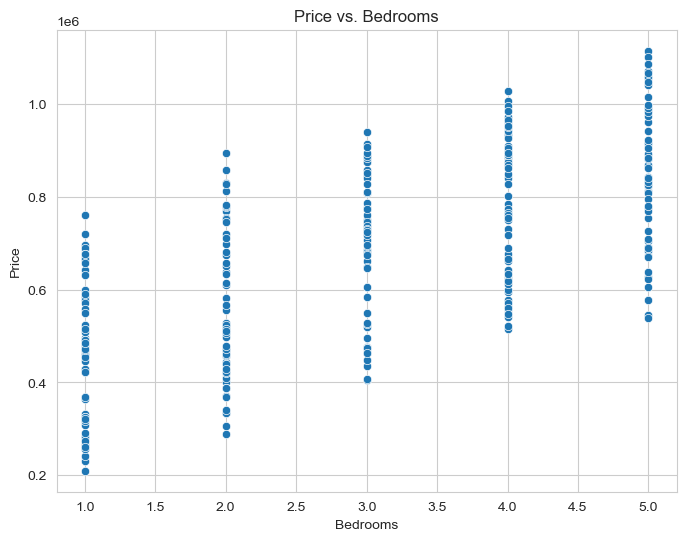

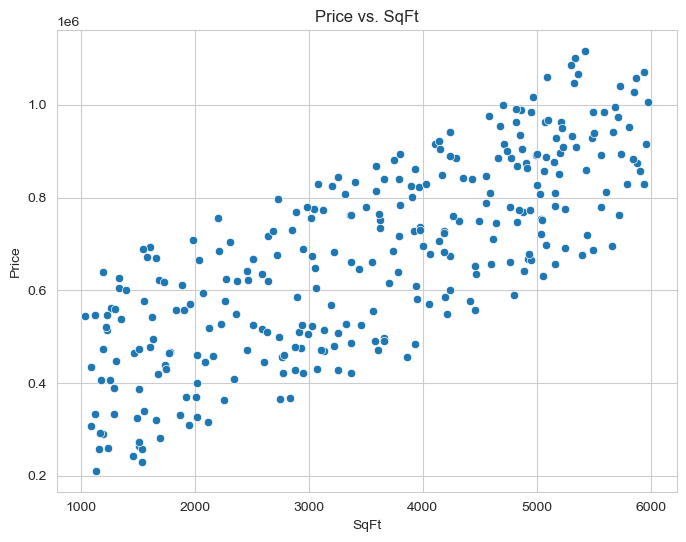

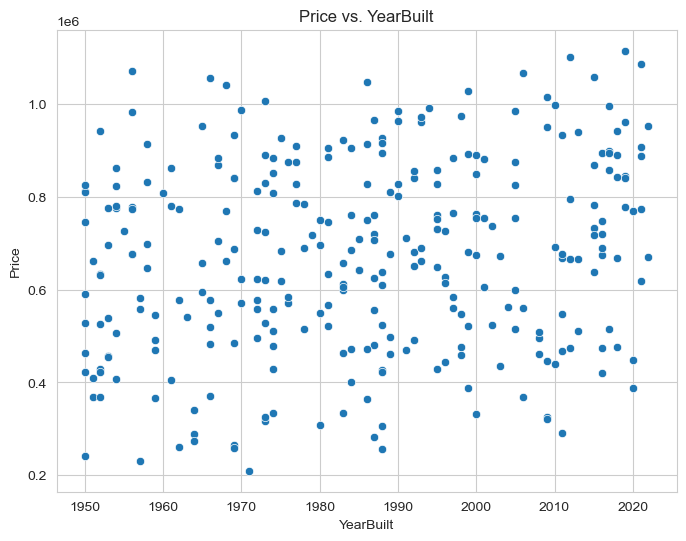

In [8]:
# Bivariate Analysis: Scatter plots of numerical features vs. Price
numerical_features = ["Bedrooms", "SqFt", "YearBuilt"]

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data["Price"])
    plt.title(f"Price vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

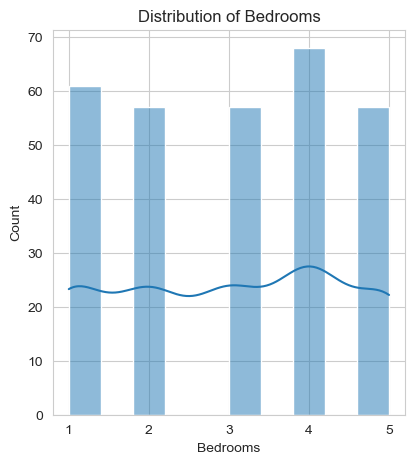

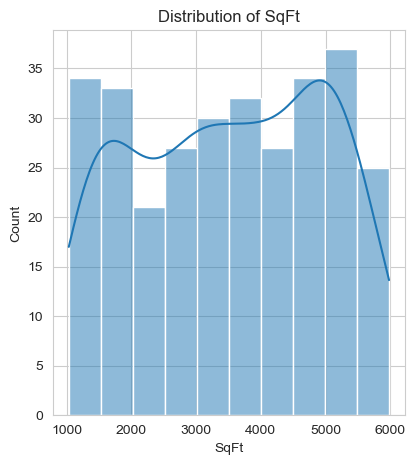

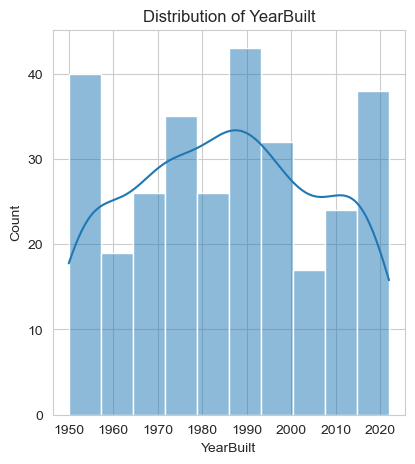

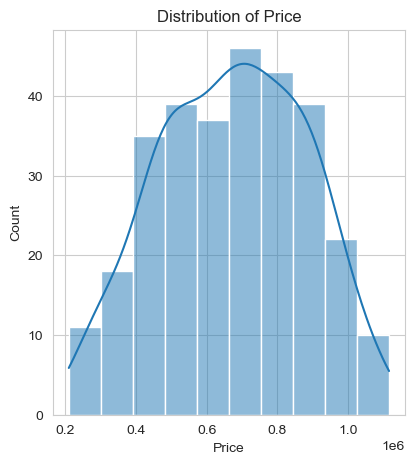

In [9]:
# List of numerical columns for univariate analysis
numerical_cols = ['Bedrooms', 'SqFt', 'YearBuilt', 'Price']
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

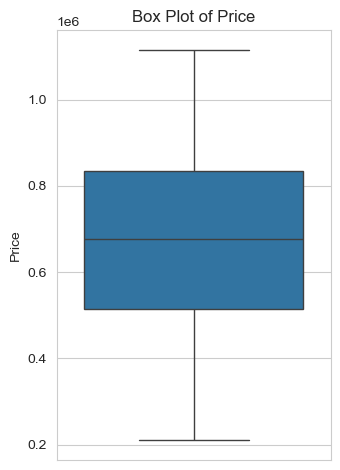

In [10]:
# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=data[col])
plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

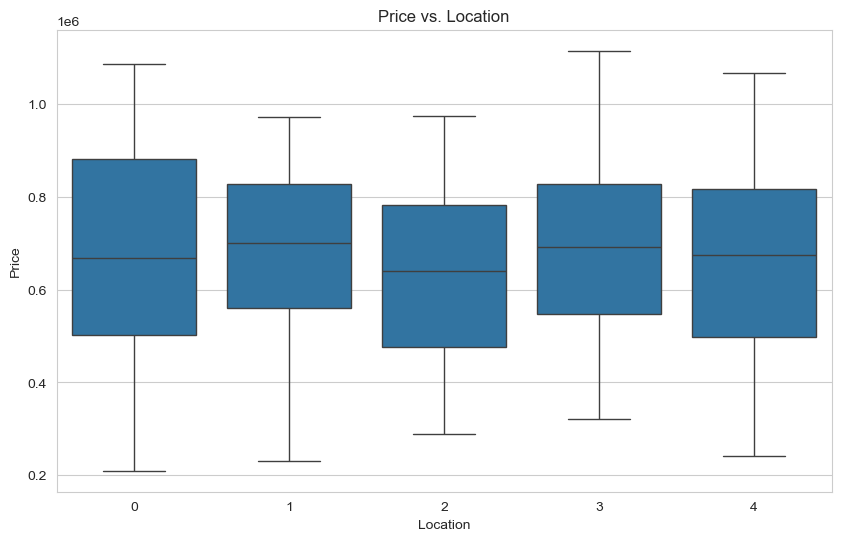

In [11]:
# Bivariate Analysis: Box plot for Location vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Location"], y=data["Price"])
plt.title("Price vs. Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

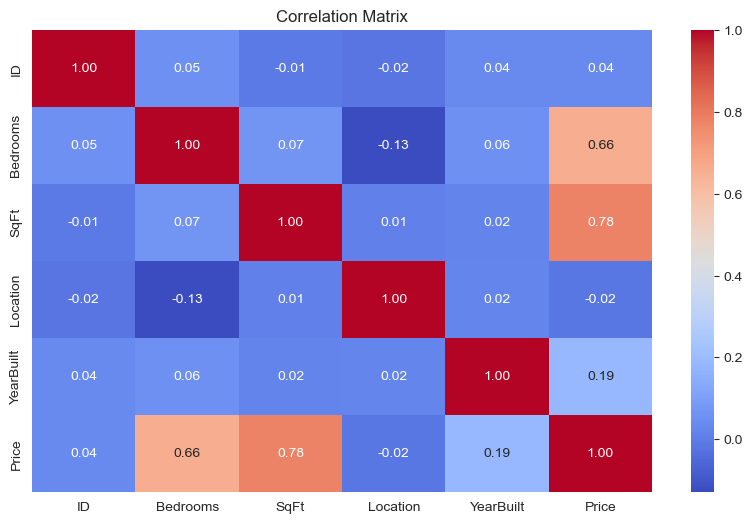

In [12]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Use Of LinearRegression And Gradient Boosting

In [13]:
from sklearn.model_selection import train_test_split
#LinearRegression Algorithm
from sklearn.linear_model import LinearRegression
#Gradien Boosting
from sklearn.ensemble import GradientBoostingRegressor
#import standerd scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [124]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(n_estimators=90, max_depth=7, learning_rate=0.1, random_state=42))
])

In [125]:
X=data.drop('Price',axis=1)
y=data[['Price']]

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
model.fit(X_train,y_train)

c:\Users\Master\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=7, n_estimators=90,
                                           random_state=42))])

In [128]:
y_pred=model.predict(X_test)

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [130]:
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))
print('root_mean_squared_error',root_mean_squared_error(y_test,y_pred))

mean_squared_error 1168216661.1810095
mean_absolute_error 25484.75220743143
r2_score 0.9703793691813424
root_mean_squared_error 34179.18461843421


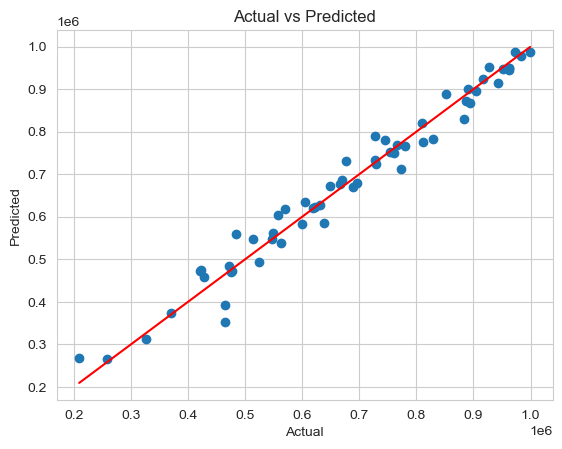

In [142]:
#scatter plot for Actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # diagonal line
plt.show()

In [ ]:
#new data for prediction
new_data = pd.DataFrame([{
    'ID': 1,
    'Bedrooms':2,
    'SqFt': 5036,
    'Location':2,
    'YearBuilt':1987
}])

In [133]:
data.head(10)

,ID,Bedrooms,SqFt,Location,YearBuilt,Price
0,1,2,5036,2,1987,720537
1,2,4,4855,2,2011,934614
2,3,2,2093,0,1996,444449
3,4,1,4892,4,1985,641913
4,5,2,4881,4,2020,769609
5,6,1,2935,3,2018,476242
6,7,3,3558,4,1968,661515
7,8,5,4818,0,1993,962665
8,9,5,2306,1,1967,704313
9,10,2,4768,4,2019,779366


In [134]:
model.predict(new_data)

array([720583.19481754])